In [137]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')



import os



In [138]:
customers = pd.read_csv('../jupyter/model.csv')
predict = pd.read_csv('../jupyter/predict.csv')

In [139]:
customers.head()

,SignUpId,CreditCard,Age,Gender,RegionCode,DeviceType,NoOfDevicesUsed,HoursPerDay,isPremiumserviceUsed,keyPress,NoShowsWatched,EoFEvents,EmptySearchResults,Wifi/MobileData,WatchSession,RecommendationSuccess,ExtenstionofTrails,GlobalEvent,DetectedMAC,ProfiledAge,WeekOfMonth,MostActiveTimeofDayForDataUsage,VPN,DownloadHistory,NoConnectedDevicesinHome,CostOfDevices,BoughtMembership
0,bbe3fa98-0f6c-11eb-b477-186590d21c4d,1,45,2,1000,1,2,8,0,487,3,8,4,2,2,7,1,1,bbe4006a-0f6c-11eb-b477-186590d21c4d,1,3,4,0,3,23,1856522,1
1,bbe51770-0f6c-11eb-b477-186590d21c4d,1,40,2,1004,1,4,5,1,710,9,1,3,2,4,11,1,1,bbe51c7a-0f6c-11eb-b477-186590d21c4d,1,3,1,0,3,71,955483,1
2,bbe6313c-0f6c-11eb-b477-186590d21c4d,3,45,1,1000,5,5,11,1,849,8,8,1,2,4,7,0,1,bbe63704-0f6c-11eb-b477-186590d21c4d,1,4,4,0,1,99,912528,0
3,bbe73b4a-0f6c-11eb-b477-186590d21c4d,1,84,1,1004,3,5,17,1,346,1,8,3,2,4,11,3,1,bbe7407c-0f6c-11eb-b477-186590d21c4d,1,2,2,0,2,66,877746,0
4,bbe85124-0f6c-11eb-b477-186590d21c4d,1,24,2,1005,5,5,9,1,756,6,5,1,2,3,7,1,1,bbe857d2-0f6c-11eb-b477-186590d21c4d,1,3,4,0,1,76,1782479,1


In [140]:
df = customers.iloc[:,1:]

<AxesSubplot:>

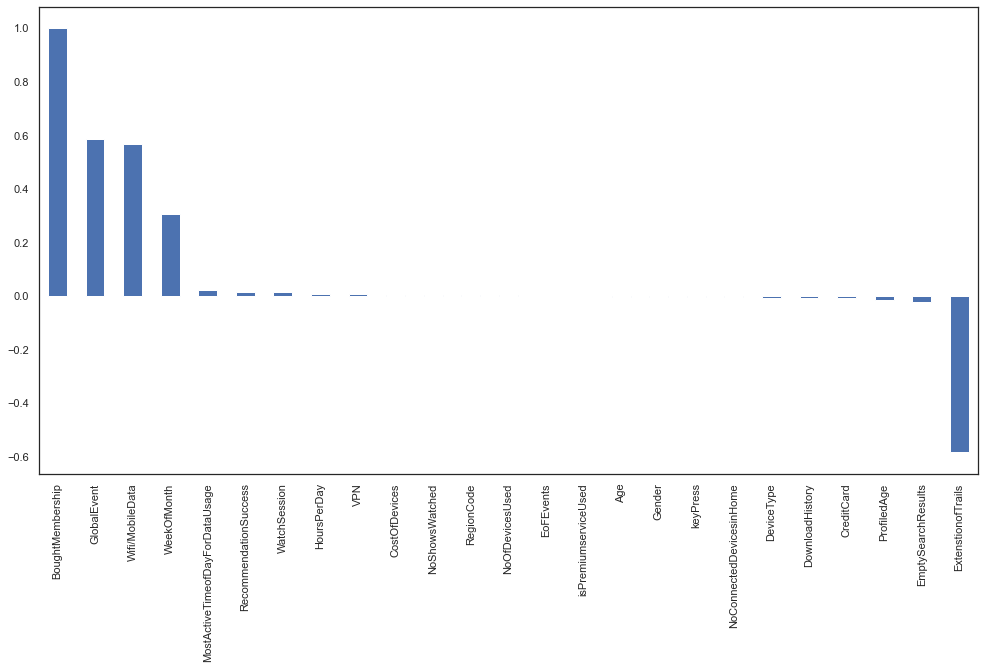

In [141]:
plt.figure(figsize=(15,8))
df.corr()['BoughtMembership'].sort_values(ascending = False).plot(kind='bar')

prediction test  [1 0 1 ... 0 0 1]
Actual Result  [0 0 1 ... 0 0 1]
0.947
AxesSubplot(0.08,0.07;0.87x0.81)


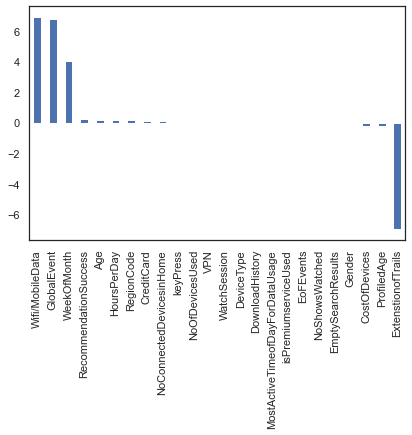

In [142]:
df = df.drop(columns = ['DetectedMAC'])
#df = df.drop(columns = ['DeviceType','WatchSession','RecommendationSuccess','WifiMobileData'])
y = df['BoughtMembership'].values
X = df.drop(columns = ['BoughtMembership'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)
print("prediction test ",prediction_test)
print("Actual Result ",y_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:25].plot(kind='bar'))

#dfp = customers.iloc[:,1:]
#dfp = dfp.drop(columns = ['DetectedMAC'])
#P = dfp.drop(columns = ['BoughtMembership'])

#prediction_testActual = model.predict(P)
#print("Prediction Result New ",prediction_testActual)

0.988


<AxesSubplot:>

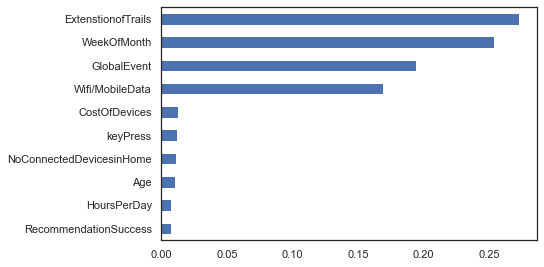

In [143]:


#Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 1000)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [144]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.988

In [145]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,CreditCard,Age,Gender,RegionCode,DeviceType,NoOfDevicesUsed,HoursPerDay,isPremiumserviceUsed,keyPress,NoShowsWatched,EoFEvents,EmptySearchResults,Wifi/MobileData,WatchSession,RecommendationSuccess,ExtenstionofTrails,GlobalEvent,ProfiledAge,WeekOfMonth,MostActiveTimeofDayForDataUsage,VPN,DownloadHistory,NoConnectedDevicesinHome,CostOfDevices,BoughtMembership
CreditCard,1.000000,0.257681,0.025213,-0.013980,0.020143,-0.023517,-0.000732,-0.145539,0.003918,0.003193,0.182296,-0.008953,-0.017433,-0.014875,-0.018397,-0.010490,-0.011765,0.018224,-0.011549,-0.000338,-0.001959,-0.022109,-0.001144,0.006939,-0.008823
Age,0.257681,1.000000,0.007253,0.007773,-0.000819,-0.004657,0.002512,-0.281672,0.003970,-0.002863,0.565367,0.006867,-0.008782,-0.036130,0.000333,-0.000896,-0.010769,0.008139,0.001513,-0.013153,0.000499,-0.012396,-0.005860,-0.000590,-0.001909
Gender,0.025213,0.007253,1.000000,-0.003507,-0.003734,-0.009771,0.013382,0.012413,0.009723,0.009759,0.000244,0.009159,0.009455,0.013758,-0.000625,-0.002417,-0.018010,0.004422,0.000910,0.014764,-0.018002,0.005356,-0.004009,-0.010153,-0.002201
RegionCode,-0.013980,0.007773,-0.003507,1.000000,0.014942,-0.012505,-0.008960,-0.015035,0.001787,0.006220,0.002860,0.011072,-0.009739,-0.003536,0.008734,-0.009925,-0.003900,0.000535,0.004766,-0.002121,0.008231,-0.008367,-0.003999,-0.008909,0.004480
DeviceType,0.020143,-0.000819,-0.003734,0.014942,1.000000,-0.006642,0.017971,0.013450,0.011559,-0.005487,-0.011348,-0.017586,0.012229,-0.007660,-0.011266,0.008892,-0.010861,0.002304,0.002848,-0.000069,-0.007035,-0.005366,0.007526,-0.019311,-0.006163
NoOfDevicesUsed,-0.023517,-0.004657,-0.009771,-0.012505,-0.006642,1.000000,0.003274,-0.005576,-0.000390,0.020012,-0.003726,-0.006717,-0.002794,0.005642,-0.007386,-0.004911,0.007822,0.004527,0.006828,-0.009241,-0.007605,0.002266,-0.009765,-0.004227,0.004274
HoursPerDay,-0.000732,0.002512,0.013382,-0.008960,0.017971,0.003274,1.000000,-0.013832,0.018573,-0.001123,0.000981,-0.000029,-0.008983,0.011181,-0.005736,-0.001406,0.011181,-0.021215,-0.007887,0.003105,-0.005427,-0.004824,0.009953,-0.011236,0.008094
isPremiumserviceUsed,-0.145539,-0.281672,0.012413,-0.015035,0.013450,-0.005576,-0.013832,1.000000,-0.017342,-0.001810,-0.204726,-0.015915,0.007041,0.020829,0.014848,0.020077,0.000665,-0.004263,-0.021260,0.001828,0.007915,0.019108,0.014619,-0.008790,-0.001392
keyPress,0.003918,0.003970,0.009723,0.001787,0.011559,-0.000390,0.018573,-0.017342,1.000000,-0.015056,0.015499,0.000530,0.005935,-0.001539,-0.002752,0.009842,-0.001905,0.018246,-0.009309,0.033006,-0.002830,0.016442,0.002721,0.000661,-0.004733
NoShowsWatched,0.003193,-0.002863,0.009759,0.006220,-0.005487,0.020012,-0.001123,-0.001810,-0.015056,1.000000,-0.002240,0.015194,0.010863,-0.002122,-0.004892,-0.003607,-0.001729,0.006295,-0.010792,-0.006743,-0.022024,0.017824,0.002788,-0.015703,0.004740
